In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Major Studios vs Median Gross Income

## First import the .csv file and run a quick analysis

In [2]:
gross = pd.read_csv('bom.movie_gross.csv')

In [3]:
gross.head()
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [4]:
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### Looks like there are a lot of NaN values for the "foreign_gross" data.  Let's get rid of those and see how it looks:

In [5]:
NA_drops = gross.copy()
NA_drops.dropna(inplace = True)
print(gross.info())
print(NA_drops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB
None


### Wow!  That is a very significant drop in the number of titles which can be directly compared.  Let's dive further into these truncated data:

####  We'll start by sorting the "foreign_gross" column since it seems to be our problem child

In [6]:
foreign = NA_drops.copy()
foreign = foreign.sort_values('foreign_gross',ascending=True)
foreign.head(10)

,title,studio,domestic_gross,foreign_gross,year
921,Chasing Mavericks,Fox,6000000.0,600.0,2012
721,To Die Like a Man,Strand,4000.0,900.0,2011
2760,The Fate of the Furious,Uni.,226000000.0,1010.0,2017
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
1874,Furious 7,Uni.,353000000.0,1163.0,2015
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
316,The Red Baron,Mont.,37200.0,3100.0,2010
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500.0,2010
304,Waking Sleeping Beauty,BV,80700.0,4200.0,2010


####  Hmmm... There are some odd comparisons to be noted here.  For example, the "Star Wars" film grossed nearly $1,000,000,000 in the US, but only $1,000 internationally?  It is not alone.  Something is fishy here.

In [7]:
domestic = NA_drops.copy()
domestic = domestic.sort_values('domestic_gross', ascending=False)
domestic.head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


####  A quick sort by "domestic_gross" shows some pretty inconsistent results.  It would appear that there are multiple movies that match the "Star Wars" example above, but a goodly amount of correlating results as well, such as "Black Panther" and others.  So, some movies appear to show a 1 million-fold discrepancy, and others seem to correlate directly.  This complicates things:  We can't just apply a 1 milllion-fold correction factor to all results because this would appear to majorly skew other results.

####  Maybe we can just apply a 1 million-fold correction factor to all comparisons which clearly warrant it.  Let's take another look at the data sorted by foreign gross, ascending:

In [8]:
foreign.head(10)

,title,studio,domestic_gross,foreign_gross,year
921,Chasing Mavericks,Fox,6000000.0,600.0,2012
721,To Die Like a Man,Strand,4000.0,900.0,2011
2760,The Fate of the Furious,Uni.,226000000.0,1010.0,2017
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
1874,Furious 7,Uni.,353000000.0,1163.0,2015
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
316,The Red Baron,Mont.,37200.0,3100.0,2010
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500.0,2010
304,Waking Sleeping Beauty,BV,80700.0,4200.0,2010


###  The very first entry, "Chasing Mavericks" shows a very large discrepancy as well.  However, this one is more like 10,000x difference.  The last 3 listed examples show the need for even more necessary correction factors....

## __This has gotten way too complicated.  Let's just bypass the "foreign_gross" data as it is too inconsistent for us to use in this analysis.__


###  We still have a few NaN values in the "domestic_gross" column so let's take care of those.  We'll need to bypass the "foreign_gross" NaN's when we do this.

In [9]:
studio_df_no_NA = NA_drops.copy()
studio_df = gross.copy()
studio_df = studio_df.drop(columns = 'foreign_gross')
studio_df.dropna(inplace = True)

###  And now another analysis of those results:

In [10]:
studio_list = [studio for studio in studio_df['studio']]
print("First 10 Studios:  " + str(studio_list[:10]))
print("Total Studio Count:  " + str(len(studio_list)))
print()
unique_studio_list = sorted(list(set(studio_list)))
print("Unique Studios:  " + str(unique_studio_list[:10]))
print("Unique Studio Count:  " + str(len(unique_studio_list)))
print()
dom_gross_list = [int(dom) for dom in studio_df['domestic_gross']]
print("First 10 Domestic Grosses:  " + str(dom_gross_list[:10]))
print("Domestic Grosses Count:  " + str(len(dom_gross_list)))
print()

summary_dict = {}
for entry in range(len(studio_list)):
    if studio_list[entry] in summary_dict.keys():
        summary_dict[studio_list[entry]]["Grosses"].append(dom_gross_list[entry])
    else:
        summary_dict[studio_list[entry]] = {}
        summary_dict[studio_list[entry]]["Grosses"] = [dom_gross_list[entry]]

import statistics as st
import random

for studio in summary_dict:
    summary_dict[studio]['max_gross'] = max(summary_dict[studio]['Grosses'])
    summary_dict[studio]['min_gross'] = min(summary_dict[studio]['Grosses'])
    summary_dict[studio]['total_gross'] = sum(summary_dict[studio]['Grosses'])
    summary_dict[studio]['total_films'] = len(summary_dict[studio]['Grosses'])
    summary_dict[studio]['mean_gross'] = int(summary_dict[studio]['total_gross'] / summary_dict[studio]['total_films'])
    summary_dict[studio]['median_gross'] = int(st.median(summary_dict[studio]['Grosses']))
year_range = [year for year in studio_df['year']]
unique_year_range = sorted(list(set(year_range)))
print("Production Year Range:  " + str(unique_year_range[:10]))
print()


check = random.randint(0,len(summary_dict)-1)
print("Studio \"" + str(unique_studio_list[check]) + "\":  " + str(summary_dict[unique_studio_list[check]]))


First 10 Studios:  ['BV', 'BV', 'WB', 'WB', 'P/DW', 'Sum.', 'Par.', 'BV', 'Uni.', 'P/DW']
Total Studio Count:  3356

Unique Studios:  ['3D', 'A23', 'A24', 'ADC', 'AF', 'AGF', 'ALP', 'AM', 'AR', 'ATO']
Unique Studio Count:  255

First 10 Domestic Grosses:  [415000000, 334200000, 296000000, 292600000, 238700000, 300500000, 312400000, 200800000, 251500000, 217600000]
Domestic Grosses Count:  3356

Production Year Range:  [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

Studio "Gold.":  {'Grosses': [4800000, 1800000, 3800000, 159000, 1500000, 1100000, 1100000, 200000, 3300000, 1000000, 76400, 22800, 12400, 2300000, 1200000, 418000, 75100, 58300, 173000, 172000, 145000, 38300, 3500, 113000], 'max_gross': 4800000, 'min_gross': 3500, 'total_gross': 23566800, 'total_films': 24, 'mean_gross': 981950, 'median_gross': 186500}


###  Ok, so lot's of films, but a much lower number of unique studios.  We also have a list of the top 10 grossing studios, a date range for the films we analyzed, and one example studio summary at the bottom.  Ok, let's take this further.


##  We'll start with a summary table of all __unique__ studios in this analysis:

In [11]:

summary_df = pd.DataFrame(summary_dict)
summary_df.head(7)


,BV,WB,P/DW,Sum.,Par.,Uni.,Fox,Wein.,Sony,FoxS,...,PackYourBag,Gaum.,Grindstone,Conglomerate,MUBI,Darin Southa,Super,CARUSEL,PDF,Synergetic
Grosses,"[415000000, 334200000, 200800000, 172100000, 9...","[296000000, 292600000, 163200000, 100500000, 1...","[238700000, 217600000, 148400000, 73000000, 35...","[300500000, 90400000, 53000000, 15500000, 1910...","[312400000, 131800000, 128000000, 171200000, 8...","[251500000, 105300000, 148400000, 62000000, 35...","[104400000, 76400000, 42800000, 88800000, 7720...","[135500000, 658000, 9700000, 1500000, 44700000...","[176600000, 118300000, 67600000, 162000000, 97...","[107000000, 18300000, 4000000, 21500000, 20300...",...,"[901000, 182000]",[411000],[10000],[147000],[117000],[93200],"[52100, 46300]","[13000, 10000]",[11700],[2400]
max_gross,936700000,448100000,352400000,300500000,312400000,652300000,363100000,162800000,404500000,107000000,...,901000,411000,10000,147000,117000,93200,52100,13000,11700,2400
min_gross,48500,139000,18500000,971000,6700,22000,2800000,9600,2500,46500,...,182000,411000,10000,147000,117000,93200,46300,10000,11700,2400
total_gross,18419029199,12168046000,1682900000,931871000,7685870699,12902393000,10949499997,1540550498,8459683098,1061831500,...,1083000,411000,10000,147000,117000,93200,98400,23000,11700,2400
total_films,106,140,10,15,101,147,136,77,109,66,...,2,1,1,1,1,1,2,2,1,1
mean_gross,173764426,86914614,168290000,62124733,76097729,87771380,80511029,20007149,77611771,16088356,...,541500,411000,10000,147000,117000,93200,49200,11500,11700,2400
median_gross,92100000,47250000,157250000,20400000,57700000,61000000,62150000,7200000,63500000,6850000,...,541500,411000,10000,147000,117000,93200,49200,11500,11700,2400


In [12]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Grosses to median_gross
Columns: 255 entries, BV to Synergetic
dtypes: object(255)
memory usage: 14.0+ KB


###  Seven categories, not too bad.  But 255 studios?  That's a bit much to look at, all at once.  Let's try to summarize:

In [13]:
unique_studio_grosses = []
for unique_studio in unique_studio_list:
    unique_studio_grosses.append(summary_dict[unique_studio]["Grosses"])
unique_studio_max = [int(summary_dict[studio]['max_gross']) for studio in unique_studio_list]
unique_studio_min = [int(summary_dict[studio]['min_gross']) for studio in unique_studio_list]
unique_studio_total_gross = [int(summary_dict[studio]['total_gross']) for studio in unique_studio_list]
unique_studio_total_films = [int(summary_dict[studio]['total_films']) for studio in unique_studio_list]
unique_studio_mean_gross = [int(summary_dict[studio]['mean_gross']) for studio in unique_studio_list]
unique_studio_median_gross = [int(summary_dict[studio]['median_gross']) for studio in unique_studio_list]
print()
print()
tot = len(unique_studio_list)
print("Stats from 2010 - 2018")
print("tot unique studios:  " + str(tot))
print()
tot_max = len(list(set(unique_studio_max)))
max_studio = max(unique_studio_max)
studios_w_max = []
for studio in unique_studio_list:
    if summary_dict[studio]['max_gross'] == max_studio:
        studios_w_max.append(studio)
print("tot unique max:  " + str(tot_max) + "  (" + str(tot - tot_max) + " share max gross movie with at least 1 other studio)")
print("max studio gross:  " + str(max_studio))
print("studio(s) with max:  " + str(studios_w_max))
print()
tot_min = len(list(set(unique_studio_min)))
min_studio = min(unique_studio_min)
studios_w_min = []
for studio in unique_studio_list:
    if summary_dict[studio]['min_gross'] == min_studio:
        studios_w_min.append(studio)
print("tot unique min:  " + str(tot_min) + "  (" + str(tot - tot_min) + " share min gross movie with at least 1 other studio)")
print("min studio gross:  " + str(min_studio))
print("studio(s) with min:  " + str(studios_w_min))
print()
tot_total_gr = len(list(set(unique_studio_total_gross)))
mean_total_gr = int(st.mean(unique_studio_total_gross))
median_total_gr = int(st.median(unique_studio_total_gross))
print("tot unique total gross:  " + str(tot_total_gr) + "  (" + str(tot - tot_total_gr) + " share total gross with at least 1 other studio)")
print("mean total gross:  " + str(mean_total_gr))
print("median total gross:  " + str(median_total_gr))
print()
tot_total_film = len(list(set(unique_studio_total_films)))
max_st_unique = max(unique_studio_total_films)
max_st_unique_list = []
for studio in unique_studio_list:
    if summary_dict[studio]['total_films'] == max_st_unique:
        max_st_unique_list.append(studio)
max_list = []
med_list = []
for studio in max_st_unique_list:
    max_list.append(int(summary_dict[studio]['mean_gross']))
    med_list.append(int(summary_dict[studio]['median_gross']))
print("tot unique total films:  " + str(tot_total_film))
print("studio(s) with max # films:  " + str(max_st_unique_list) + "  (mean gross:  " + str(max_list) + "  median gross:  " + str(med_list) + ")")
print()
tot_mean = len(list(set(unique_studio_mean_gross)))
avg_mean = int(st.mean(unique_studio_mean_gross))
top_mean = int(max(unique_studio_mean_gross))
top_mean_index = unique_studio_mean_gross.index(top_mean)
top_mean_studio = unique_studio_list[top_mean_index]
tot_mean_movies = summary_dict[top_mean_studio]['total_films']
print("tot unique mean gross:  " + str(tot_mean))
print("avg mean gross:  " + str(avg_mean))
print('top mean gross:  ' + str(top_mean) + "(" + str(top_mean_studio) + " - " + str(tot_mean_movies) + " total movies).")
print()
tot_median = len(list(set(unique_studio_median_gross)))
avg_median = int(st.median(unique_studio_median_gross))
top_median = int(max(unique_studio_median_gross))
top_median_index = unique_studio_median_gross.index(top_median)
top_median_studio = unique_studio_list[top_median_index]
tot_median_movies = summary_dict[top_median_studio]['total_films']
print("tot unique median gross:  " + str(tot_median))
print("avg median gross:  " + str(avg_median))
print("top median gross:  "  + str(top_median) + "(" + str(top_median_studio) + " - " + str(tot_median_movies) + " total movies).")
print()




Stats from 2010 - 2018
tot unique studios:  255

tot unique max:  218  (37 share max gross movie with at least 1 other studio)
max studio gross:  936700000
studio(s) with max:  ['BV']

tot unique min:  208  (47 share min gross movie with at least 1 other studio)
min studio gross:  100
studio(s) with min:  ['Magn.']

tot unique total gross:  245  (10 share total gross with at least 1 other studio)
mean total gross:  378655368
median total gross:  1100000

tot unique total films:  51
studio(s) with max # films:  ['IFC']  (mean gross:  [678692]  median gross:  [141500])

tot unique mean gross:  245
avg mean gross:  6884996
top mean gross:  173764426(BV - 106 total movies).

tot unique median gross:  233
avg median gross:  229000
top median gross:  157250000(P/DW - 10 total movies).



###  Lot's of code, a bunch of stats.  What's the takehome?

- "BV" (Buena Vista, ie, Disney) has the highest gross for a single film and Magn. (Magnolia Pictures) has the lowest.
- While the mean gross of all 255 studios is almost $400 million, the median is just over $1 million.  Pretty big discrepancy.  So there are likely a small number of films grossing far more than the median, pulling the mean very high, and mis-representing films as a whole.
- "BV" also has the highest mean gross (shouldn't be a surprise), while still producing over 100 films
- "P/DW" (DreamWorks) has the highest median gross, but it only produced 10 films.


##  Now that we've broken down some individual stats, let's narrow things down a little, and visually compare these results.  Since we'd like to figure out which studio most consistently rakes in the dough, let's just look at the studios which produced > 100 films during this time period (2010 - 2018)

In [14]:
above_100 = {}
for studio in summary_dict:
    if summary_dict[studio]['total_films'] >= 100:
        above_100[studio] = summary_dict[studio]
above_100_df = pd.DataFrame(above_100)
above_100_df.head(7)

,BV,WB,Par.,Uni.,Fox,Sony,LGF,IFC,SPC,Magn.
Grosses,"[415000000, 334200000, 200800000, 172100000, 9...","[296000000, 292600000, 163200000, 100500000, 1...","[312400000, 131800000, 128000000, 171200000, 8...","[251500000, 105300000, 148400000, 62000000, 35...","[104400000, 76400000, 42800000, 88800000, 7720...","[176600000, 118300000, 67600000, 162000000, 97...","[103100000, 45700000, 47100000, 48100000, 4100...","[504000, 128000, 277000, 55800, 619000, 217000...","[3200000, 6400000, 3200000, 2100000, 1300000, ...","[27800, 552000, 5000000, 124000, 237000, 55000..."
max_gross,936700000,448100000,312400000,652300000,363100000,404500000,424700000,25400000,56800000,7100000
min_gross,48500,139000,6700,22000,2800000,2500,1400,800,66600,100
total_gross,18419029199,12168046000,7685870699,12902393000,10949499997,8459683098,4118963400,112662899,442030999,63559700
total_films,106,140,101,147,136,109,102,166,123,136
mean_gross,173764426,86914614,76097729,87771380,80511029,77611771,40381994,678692,3593747,467350
median_gross,92100000,47250000,57700000,61000000,62150000,63500000,23000000,141500,1700000,123500


###  OK, great start.  Because certain individual films could (and as we saw above, have) deceivingly skew the mean gross, let's sort these by __median__ gross instead:

In [15]:
above_100_df.sort_values('median_gross',ascending = False, axis = 1, inplace = True)
above_100_df.head(7)

,BV,Sony,Fox,Uni.,Par.,WB,LGF,SPC,IFC,Magn.
Grosses,"[415000000, 334200000, 200800000, 172100000, 9...","[176600000, 118300000, 67600000, 162000000, 97...","[104400000, 76400000, 42800000, 88800000, 7720...","[251500000, 105300000, 148400000, 62000000, 35...","[312400000, 131800000, 128000000, 171200000, 8...","[296000000, 292600000, 163200000, 100500000, 1...","[103100000, 45700000, 47100000, 48100000, 4100...","[3200000, 6400000, 3200000, 2100000, 1300000, ...","[504000, 128000, 277000, 55800, 619000, 217000...","[27800, 552000, 5000000, 124000, 237000, 55000..."
max_gross,936700000,404500000,363100000,652300000,312400000,448100000,424700000,56800000,25400000,7100000
min_gross,48500,2500,2800000,22000,6700,139000,1400,66600,800,100
total_gross,18419029199,8459683098,10949499997,12902393000,7685870699,12168046000,4118963400,442030999,112662899,63559700
total_films,106,109,136,147,101,140,102,123,166,136
mean_gross,173764426,77611771,80511029,87771380,76097729,86914614,40381994,3593747,678692,467350
median_gross,92100000,63500000,62150000,61000000,57700000,47250000,23000000,1700000,141500,123500


##  There, that looks better.  Now that we have everything we need, __let's make a plot!__

In [16]:
above_100_studios = list(above_100_df.keys())
medians = []
for median in above_100_df:
    medians.append(above_100_df[median]['median_gross'])

''

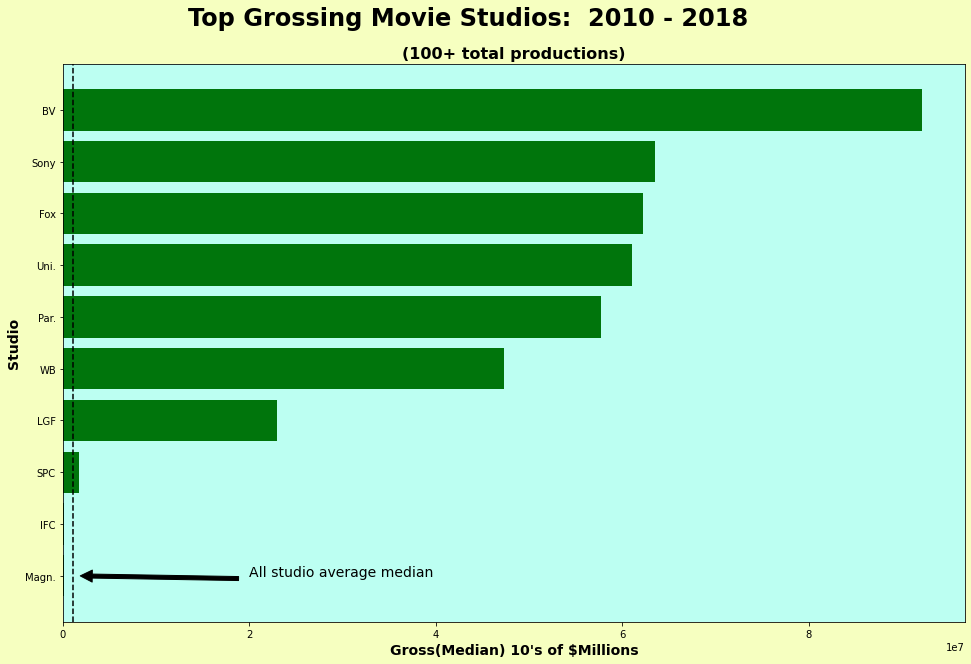

In [17]:
x = above_100_studios
x.reverse()
y = medians
y.reverse()

fig, top_studios = plt.subplots(figsize = (15,10))
fig.subplots_adjust(top=0.85)

fig.set_facecolor("#f6ffc0")
fig.suptitle('Top Grossing Movie Studios:  2010 - 2018',fontsize=24,fontweight='bold')
fig.subplots_adjust(right=.96,top=.9)
top_studios.axvline(median_total_gr, ls='--', color='black')
top_studios.annotate('All studio average median', fontsize=14, xy=(900000,'Magn.'), xytext=(20000000,'Magn.'), arrowprops=dict(facecolor='black', shrink=0.05))
top_studios.set_facecolor("#bcfff2")
top_studios.barh(x,y, color = '#00750c')
top_studios.set_title("(100+ total productions)", fontsize=16, fontweight='bold')
top_studios.set_xlabel("Gross(Median) 10's of $Millions", fontsize=14, fontweight='bold')
top_studios.set_ylabel("Studio", fontsize=14,fontweight='bold')
;

####  All studio average median is represented by the vertical dashed line

BV = Buena Vista (Disney)<br>
Uni. = Universal Studios<br>
Par. = Paramount Pictures<br>
WB = Warner Bros. Studios<br>
LGF = Lionsgate Entertainment Corp.<br>
SPC = Sony Pictures Classics<br>
IFC = Independent Film Channel (owned by AMC)<br>
Magn. = Magnolia Pictures

##  No big surprise, Buena Vista is the top grossing studio of those analyzed, with some big-hitters chasing its tail.  Now we have what we need to make an __informed__ decision!

####  A little extra info below:

In [18]:
above_100_studios = list(above_100_df.keys())
medians = []
for median in above_100_df:
    medians.append(above_100_df[median]['median_gross'])
plotting = {}
for x in range(len(medians)):
    plotting[above_100_studios[x]] = medians[x]
sorted_plotting = {key: value for key, value in sorted(plotting.items(), key=lambda item: item[0])}
print(plotting)

{'BV': 92100000, 'Sony': 63500000, 'Fox': 62150000, 'Uni.': 61000000, 'Par.': 57700000, 'WB': 47250000, 'LGF': 23000000, 'SPC': 1700000, 'IFC': 141500, 'Magn.': 123500}


In [19]:
above_100_df.sort_values("median_gross", ascending = False, axis = 1, inplace = True)
transposed = above_100_df.transpose()
transposed.head(10)

,Grosses,max_gross,min_gross,total_gross,total_films,mean_gross,median_gross
BV,"[415000000, 334200000, 200800000, 172100000, 9...",936700000,48500,18419029199,106,173764426,92100000
Sony,"[176600000, 118300000, 67600000, 162000000, 97...",404500000,2500,8459683098,109,77611771,63500000
Fox,"[104400000, 76400000, 42800000, 88800000, 7720...",363100000,2800000,10949499997,136,80511029,62150000
Uni.,"[251500000, 105300000, 148400000, 62000000, 35...",652300000,22000,12902393000,147,87771380,61000000
Par.,"[312400000, 131800000, 128000000, 171200000, 8...",312400000,6700,7685870699,101,76097729,57700000
WB,"[296000000, 292600000, 163200000, 100500000, 1...",448100000,139000,12168046000,140,86914614,47250000
LGF,"[103100000, 45700000, 47100000, 48100000, 4100...",424700000,1400,4118963400,102,40381994,23000000
SPC,"[3200000, 6400000, 3200000, 2100000, 1300000, ...",56800000,66600,442030999,123,3593747,1700000
IFC,"[504000, 128000, 277000, 55800, 619000, 217000...",25400000,800,112662899,166,678692,141500
Magn.,"[27800, 552000, 5000000, 124000, 237000, 55000...",7100000,100,63559700,136,467350,123500
